# KNN From Scratch

In this workbook we will guide you through the steps to implement KNN from scratch. Once this is done you'll implement you solution in a class that is tested with the knn_class_tester notebook.

1. Use the ```make_blobs``` function from SKLearn to make a dataset to test your KNN functions.
2. Create helper functions. These will be useful when you go to implement your class.
    - Squaring the difference of two vectors.
    - Summing the square differences and returning the square root.
    - Calculating the euclidian distances
    - An evaluation function to evalaute predictions
3. Create the KNN predcit function

In [4]:
#import libraries
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

C:\Users\rnr31\anaconda3\envs\ds22\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


### Step 1: Create a sample dataset
1. Use ```make_blobs``` to create a sample set
2. Start with 300 samples, 4 centres, 0.6 standard deviation, and random state 0
3. Plot the samples

(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

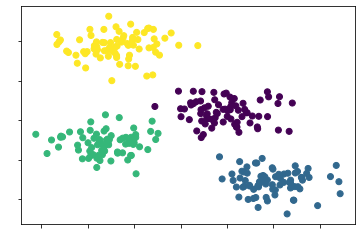

In [5]:
#make the dataset with make_blobs
X,y = make_blobs(n_samples=300,centers=4,cluster_std=0.6,random_state=0)

df1 = pd.DataFrame(X)
df1.columns = ['x_0','x_1']
X_df= df1
#print(df)
df2 = pd.DataFrame(y)
df2.columns= ['y_0']
y_df = df2
plt.scatter(X_df['x_0'],X_df['x_1'], c=y_df['y_0'])
plt.xticks(color = "white")
plt.yticks(color = "white")



# Step 2: Creating the KNN function
Pseudocode below to help out! Note: **IT IS NOT ACTUAL CODE**

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
y_train
# define train test split
#X_train
#X_test
#y_train
#y_test

array([0, 1, 2, 0, 0, 3, 0, 2, 3, 0, 3, 1, 0, 0, 2, 0, 1, 3, 3, 3, 1, 1,
       2, 1, 3, 1, 1, 3, 0, 2, 2, 1, 3, 1, 3, 0, 2, 0, 1, 1, 3, 2, 3, 2,
       2, 2, 3, 2, 0, 1, 2, 2, 1, 2, 3, 3, 3, 3, 0, 2, 2, 1, 0, 0, 3, 0,
       2, 1, 2, 1, 3, 1, 1, 1, 0, 2, 2, 1, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2,
       0, 1, 1, 0, 2, 1, 1, 3, 1, 2, 2, 0, 0, 0, 0, 3, 2, 0, 1, 2, 0, 1,
       0, 0, 2, 2, 3, 3, 2, 1, 3, 2, 0, 1, 0, 2, 3, 3, 2, 3, 0, 3, 0, 3,
       1, 1, 1, 3, 1, 3, 0, 0, 1, 2, 0, 0, 0, 3, 1, 0, 3, 2, 1, 1, 3, 0,
       3, 2, 2, 3, 3, 0, 1, 1, 2, 0, 2, 0, 2, 0, 3, 0, 1, 1, 1, 1, 3, 1,
       2, 2, 1, 3, 0, 2, 0, 0, 1, 2, 0, 3, 2, 3, 1, 1, 1, 3, 2, 1, 1, 1,
       3, 3, 1, 3, 0, 3, 3, 2, 3, 3, 2, 3, 1, 2, 2, 3, 3, 0, 0, 3, 3, 0,
       1, 1, 3, 1, 2, 1, 3, 3, 0, 2, 0, 3, 1, 2, 1, 1, 2, 1, 1, 3])

In [8]:
def get_eucledian_distance(v1, v2):
    distance = np.linalg.norm(v2-v1)
    return distance
a = get_eucledian_distance(np.array([1,1]),np.array([9,9]))
a
# v1 = np.array([1,1])
# v2 = np.array([1,1])
# a= v2-v1
# a

11.313708498984761

In [10]:
#def get_all_distances(X_train, X_test)
dist_list = []
def get_all_distances(X_train, X_test):
    for i in X_test:
        int_list = []
        for k in X_train:
            dist = get_eucledian_distance(i,k)
            int_list.append(dist)
        dist_list.append(int_list)
    return dist_list
n = get_all_distances(X_train, X_test)
n[1]

[0.7668396759784168,
 2.931311038761847,
 4.003133620098831,
 0.5220037426473446,
 1.3861843853272877,
 4.490040591042142,
 1.4028374541172695,
 2.1118068173015843,
 4.2384929224661985,
 1.3869357545754943,
 4.095958228905272,
 3.204128774787641,
 0.5934352605575364,
 1.000685249631005,
 3.7560684464684924,
 0.33851919825781335,
 2.808863714431711,
 5.214018132139746,
 5.382662113820083,
 5.445056202302152,
 2.0441551470886017,
 3.841360031178944,
 3.059190486142041,
 2.2351363948264416,
 5.029900085353932,
 3.1228875586460645,
 2.038353448617394,
 4.908111544547604,
 1.0457410788123538,
 3.3844769691413554,
 4.047308288246304,
 4.298396443969042,
 5.764822120273961,
 3.7929026076862415,
 5.829550917923972,
 0.7956525132319916,
 2.570533535343935,
 1.5205508450615934,
 2.8485220302330014,
 3.036475379825715,
 4.739097300058674,
 3.0607225225047063,
 5.0006892145323,
 3.1819456732029874,
 2.617654022723827,
 4.147233199948522,
 5.873124999950126,
 2.662948706558915,
 0.38648839713154787

In [11]:
# for i in dist_list:
#     print(len(i))
#     break
neighbour_list = []
def select_neighbours(dist_list, k):
    for i in dist_list:
        i.sort()
        neighbour_list.append(i[0:k])
    return neighbour_list
d = select_neighbours(dist_list,5)
d[1]
    

[0.256555183718309,
 0.2793842310195855,
 0.33756903589745346,
 0.33851919825781335,
 0.3511689485999446]

In [ ]:
def predict(final_n, y_train):
    access the index from my sliced_sorted_list
    get the y_train label corresponding to that index
    return most_common label among the list

In [7]:
def KNN function (X_train, X_test, y_train, y_test, k)
    # given a vector, [2.5, 4.56, 2]
    # sample X_train : [2.5,4.56] = x1,x2
    # search with same index: y_train = 2
    
    # rember to do it for all X_test vectors
    # CASE: ONE SINGLE X_train vector:
    dist_list = []
    for vector in X_train:
        # result = my get_distance function
        dist_list.append(result, index)
    final_n = select_neighbours(dist_list, k)
    ypred = predict(final_n, y_train)
    score... --> using sklearn.metrics
    or comparing 1 by 1 (ypred - ytest)
    plot... do it inside in a separate function or outside. 
    
        